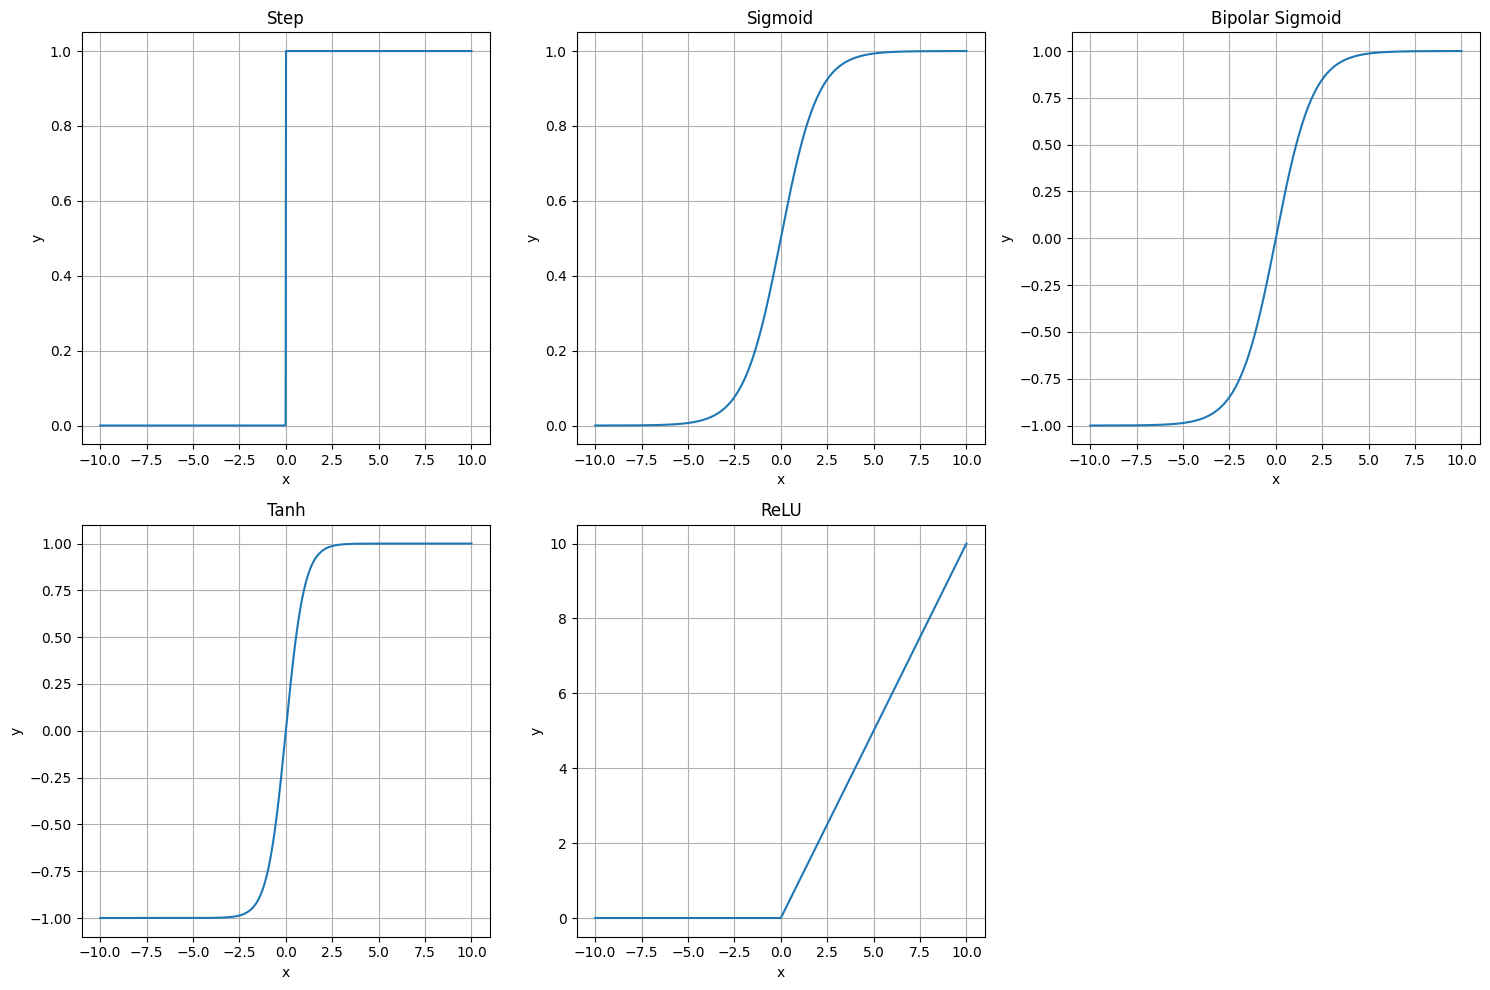

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Implement and Visualize Activation Functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Visualize activation functions
x = np.linspace(-10, 10, 1000)
functions = [
    ("Step", step_function),
    ("Sigmoid", sigmoid),
    ("Bipolar Sigmoid", bipolar_sigmoid),
    ("Tanh", tanh),
    ("ReLU", relu)
]

plt.figure(figsize=(15, 10))
for i, (name, func) in enumerate(functions, 1):
    plt.subplot(2, 3, i)
    plt.plot(x, func(x))
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


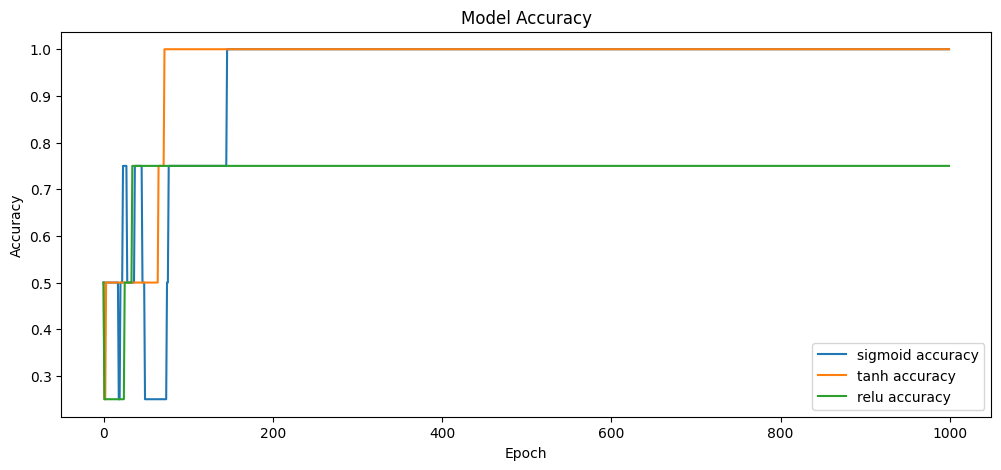

Sigmoid - Loss: 0.0202, Accuracy: 1.0000
Tanh - Loss: 0.0051, Accuracy: 1.0000
Relu - Loss: 0.0060, Accuracy: 1.0000


In [2]:
# 2. Implement a Simple Neural Network

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create models with different activation functions
def create_model(activation):
    model = Sequential([
        Dense(4, input_shape=(2,), activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X, y, epochs=1000, verbose=0)
    histories[activation] = history.history

# Plot training curves
plt.figure(figsize=(12, 5))
for activation, history in histories.items():
    plt.plot(history['accuracy'], label=f'{activation} accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate models
for activation in activations:
    model = create_model(activation)
    model.fit(X, y, epochs=1000, verbose=0)
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print(f"{activation.capitalize()} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")